## Breast Cancer Classification - Data Science and Machine Learning

In [163]:
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt

breastcancer=load_breast_cancer()

print("feature names:", breastcancer.feature_names)



feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [164]:
breastcancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [165]:
#Dataframe erstellen

df=pd.DataFrame(breastcancer.data,columns=breastcancer.feature_names)

df['target']= breastcancer.target

# Mapping erstellen
target_mapping = {0: 'malignant', 1: 'benign'}

# Neue Spalte target_name hinzufügen
df['target_name'] = df['target'].map(target_mapping)



## Grafische Darstellung

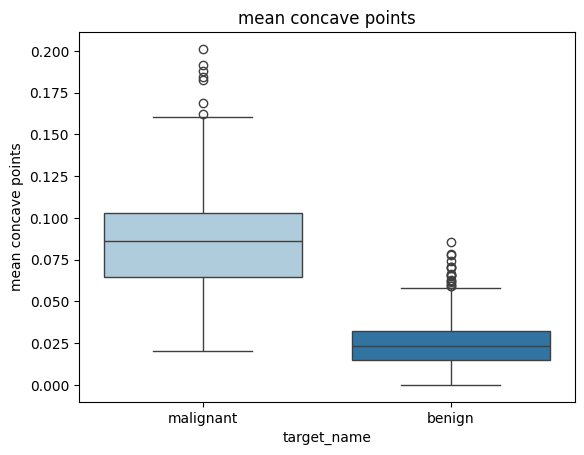

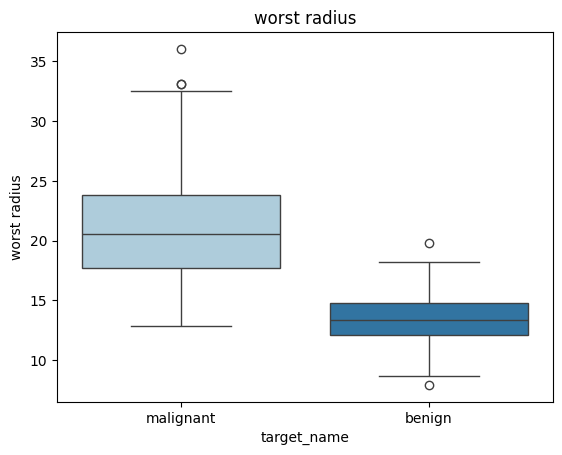

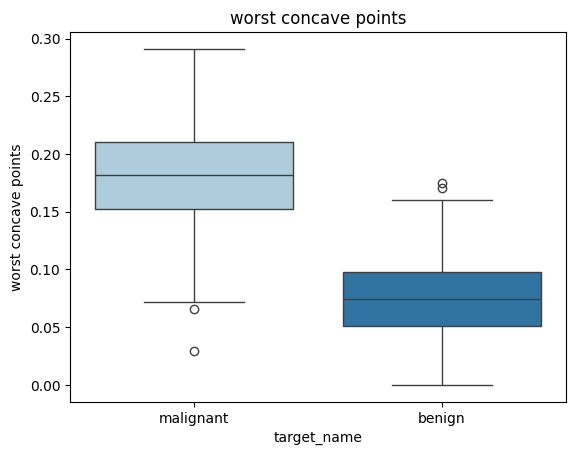

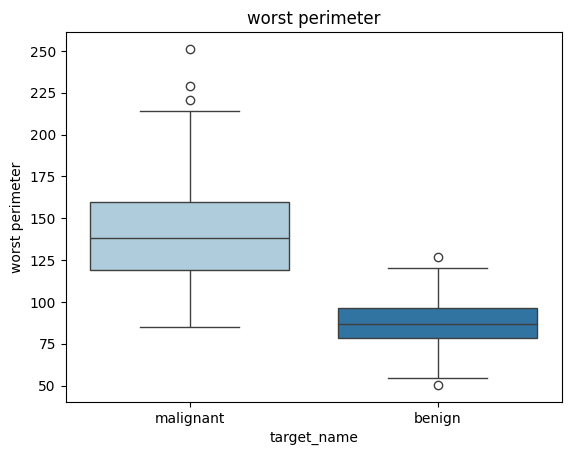

In [ ]:
import warnings
warnings.filterwarnings("ignore")

top_feature= ['mean concave points','worst radius', 'worst concave points', 'worst perimeter']

for feature in top_feature:
    if feature not in ['target', 'target_name']:
        sns.boxplot(data=df,x='target_name', y=feature, hue='target_name', palette='Paired')
        plt.title(f'{feature}')
        plt.show()


# Random Forest anwenden

In [24]:
print("target Ausprägung:", breastcancer.target_names)

target Ausprägung: ['malignant' 'benign']


In [ ]:
# Define X and y - define:

X=breastcancer.data
y=breastcancer.target

In [ ]:
#split data:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [134]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)


RandomForestClassifier()

In [135]:
y_pred = clf.predict(X_test)

In [140]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_score = accuracy_score(y_test,y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test,y_pred)

print("accuracy score = ", accuracy_score)
print(classification_report)

accuracy score =  0.9707602339181286
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [141]:
feature_importance=clf.feature_importances_

print(feature_importance)

features = breastcancer.feature_names

# DataFrame erstellen
df_importance = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)


[0.04952779 0.0206979  0.01285052 0.04880066 0.00751582 0.01271126
 0.05627671 0.16260884 0.0048505  0.00448987 0.0075926  0.00507408
 0.01046468 0.04101448 0.00466814 0.00526183 0.0070367  0.00457744
 0.00482161 0.00543777 0.13372355 0.01508492 0.10428216 0.0757512
 0.00824477 0.01212134 0.03855114 0.1166936  0.01159634 0.00767178]


## Wichtigste Einflussfaktoren auf Brustkrebs

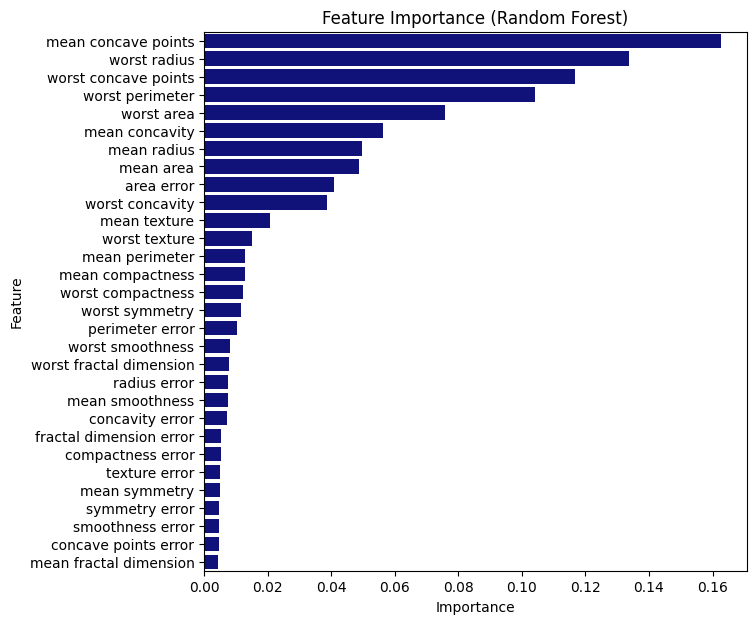

In [143]:

plt.figure(figsize=(7,7))
sns.barplot(x='Importance', y='Feature', data=df_importance, color='darkblue')
plt.title('Feature Importance (Random Forest)')
plt.show()